In this lab we will learn about CLASSIFICATION where the task is to predict the class or category. Methods:
* Problem Formulation
* Finding data
* Exploring insights in data or Explorative Data Analysis
* Data preprocessing
* Choosing and training a model
* Evaluating a model

In [2]:
# Problem Formulation

"""
Let's say you have an idea of a revolutionary mobile phone and you want to establish a start up,
but you know little about the price of mobile phones. You are interested in learning that.

You have a dataset containing the features of mobiles and the problem is to predict the price range, not
the exact price.
"""

# Finding the Data

"""
The target feature is price range and it has four price ranges: 0(low cost), 1 (medium cost), 2(high cost),
and 3(very high cost)
"""

# Downloading the data

import urllib.request
import pandas as pd

train_data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/mobile_price_train.csv'
test_data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/mobile_price_test.csv'



In [3]:
# Let's have a function that download and read data:

def download_read_data(path):
  """
  Function to retrieve data from the data paths and to read the data as a pandas
  data frame, to return the dataframe"""

  data_path = urllib.request.urlretrieve(path)[0]
  data = pd.read_csv(str(data_path))

  return data

In [4]:
mobile_train = download_read_data(train_data_path)

In [5]:
mobile_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Getting test data

mobile_test = download_read_data(test_data_path)
# mobile_test.head(2)

In [7]:
# Looking at tail (last rows) of the data

mobile_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# Checking the number of data points/size of the data
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(mobile_train), len(mobile_test)))

The size of training data is: 2000 
The size of testing data is: 1000


In [10]:
# Checking the number of features
len(mobile_train.columns)

21

**EDA Explorative Data Analysis or Exploring Insights in Data**

In [11]:
train_data = mobile_train.copy()

In [12]:
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
# Checking missing values

mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
# Checking Correlation Between Features

correlation = mobile_train.corr()
correlation['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

<Axes: >

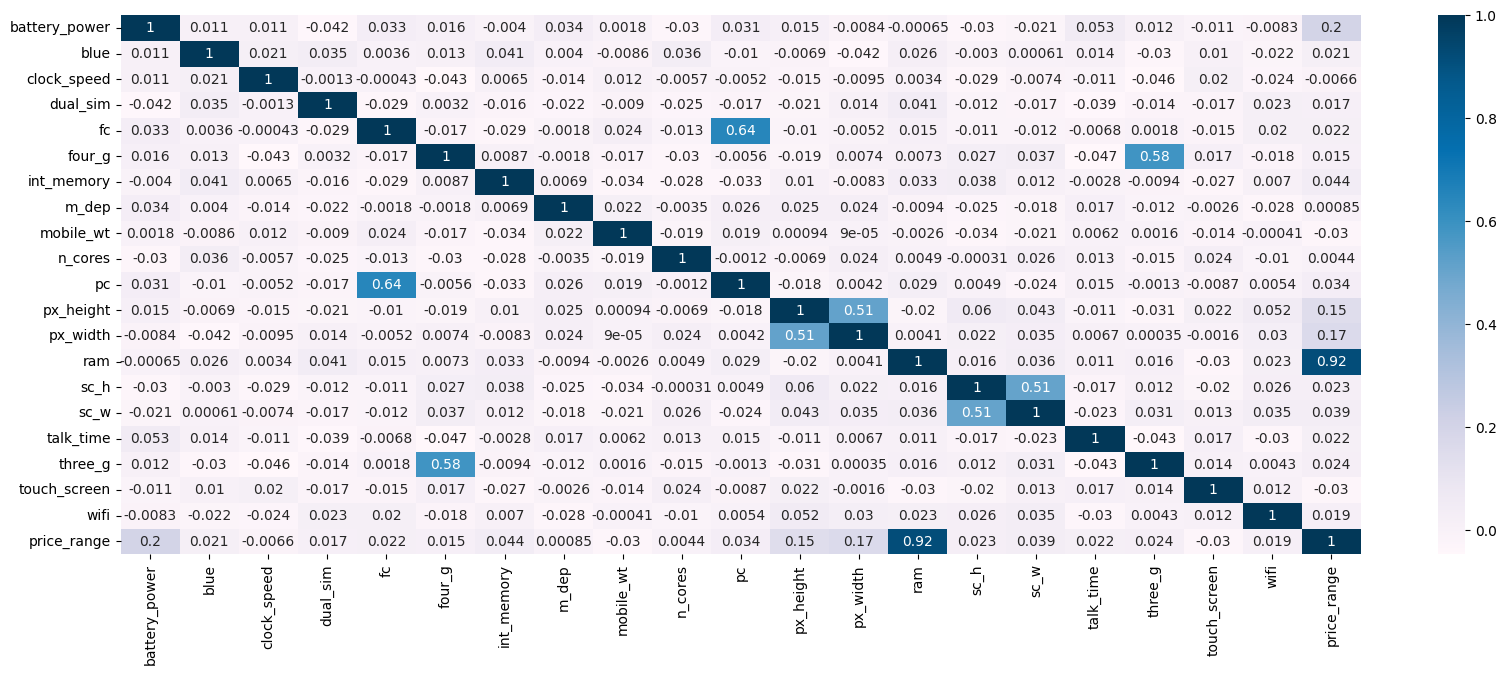

In [15]:
# Visualizing correlation

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,7))
sns.heatmap(correlation, annot=True, cmap='PuBu')

**Importance of Data Visualization**

It's best to visualize the datas in order to have a better classification of the datas and their relations with each other.

Text(0.5, 1.0, 'Mobile Price Ranges')

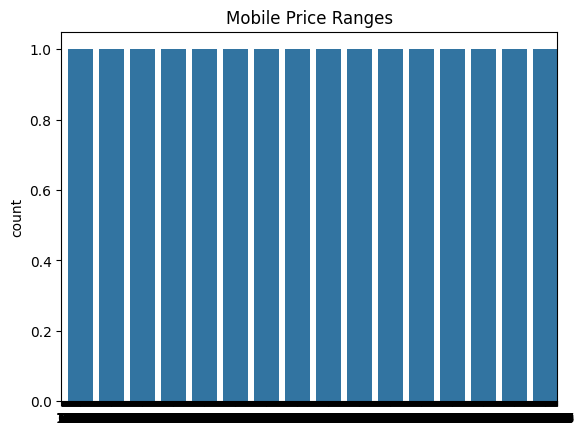

In [16]:
sns.countplot(mobile_train['price_range'])
plt.title('Mobile Price Ranges')

Text(0.5, 1.0, 'Number of Cores')

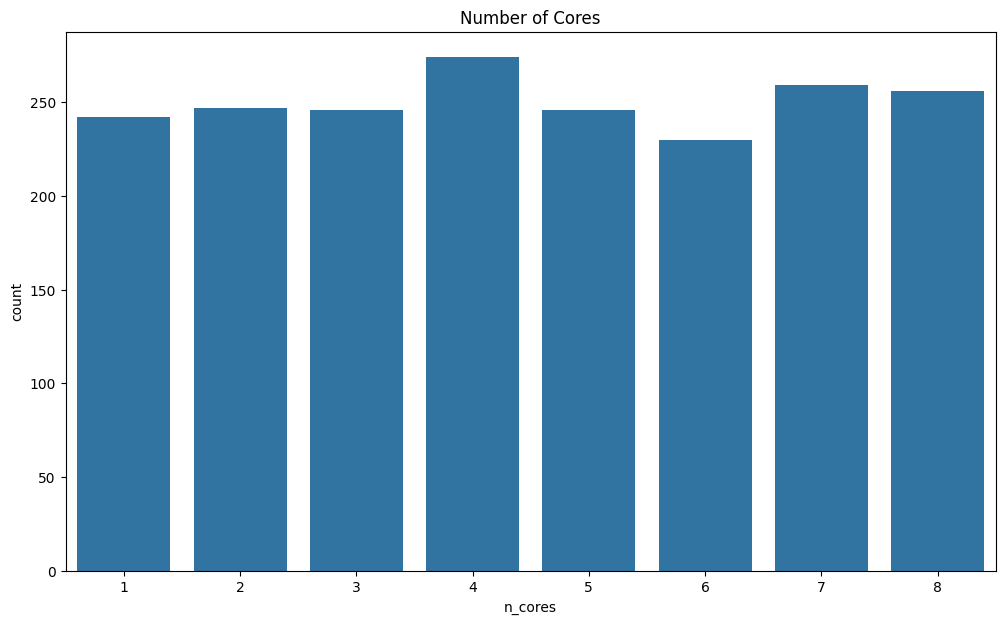

In [18]:
plt.figure(figsize=(12,7))

sns.countplot(data=mobile_train, x='n_cores')
plt.title('Number of Cores')

Text(0.5, 1.0, 'Number of Cores')

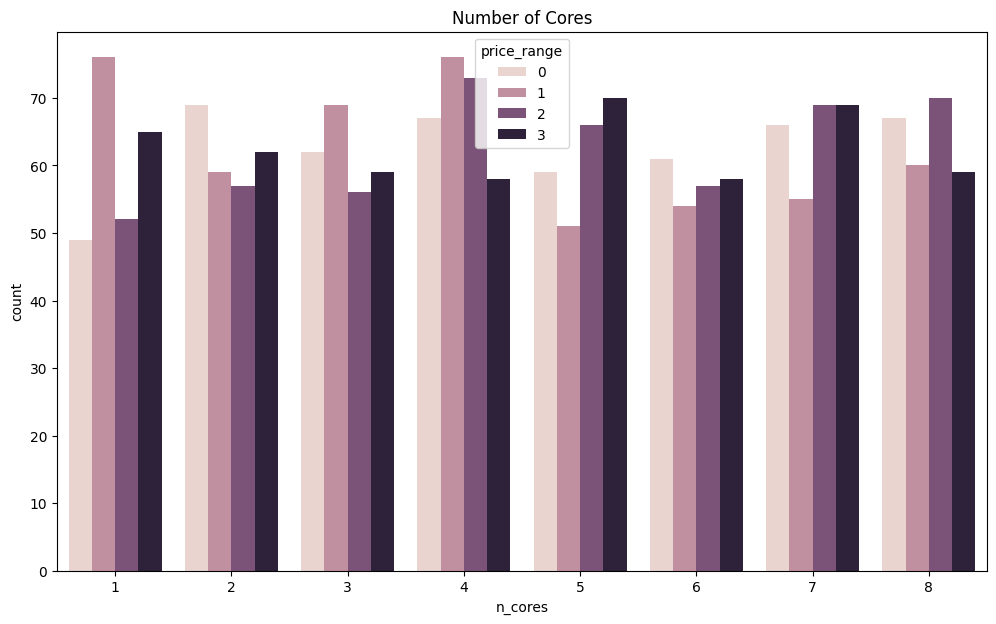

In [19]:
plt.figure(figsize=(12,7))

sns.countplot(data=mobile_train, x='n_cores', hue='price_range')
plt.title('Number of Cores')

<Axes: xlabel='mobile_wt', ylabel='Count'>

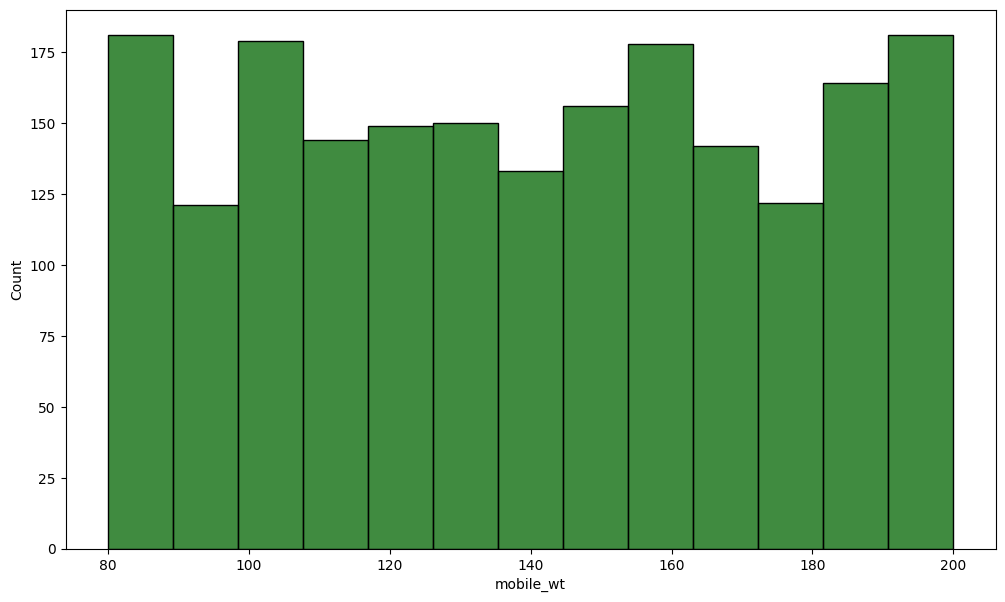

In [20]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='mobile_wt', color='darkgreen')

<Axes: xlabel='mobile_wt', ylabel='Count'>

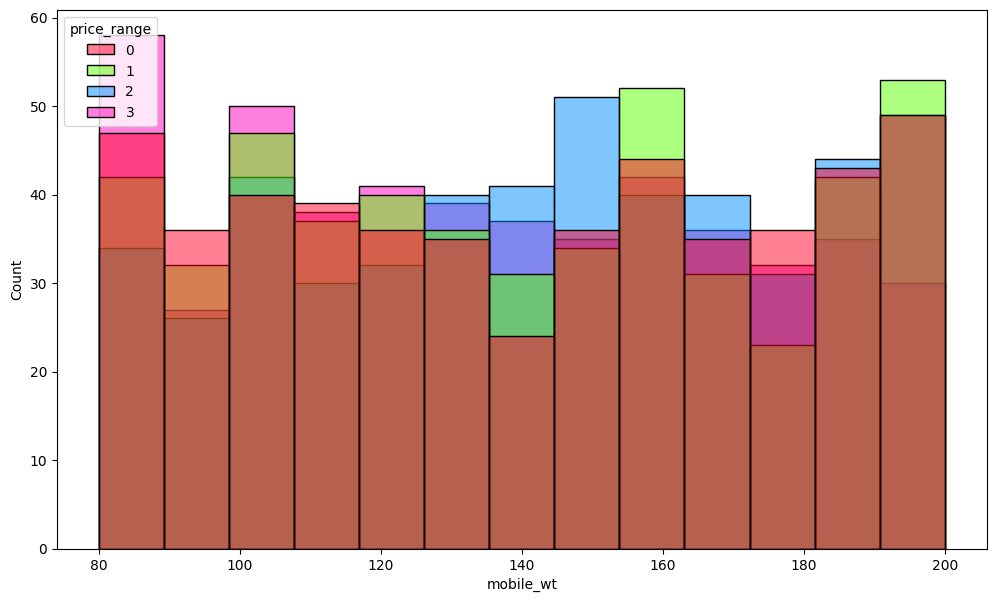

In [21]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='mobile_wt', palette='gist_rainbow', hue='price_range')

<ipython-input-22-106e30ce3c16>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=mobile_train, x='ram', palette='PRGn')


<Axes: xlabel='ram', ylabel='Count'>

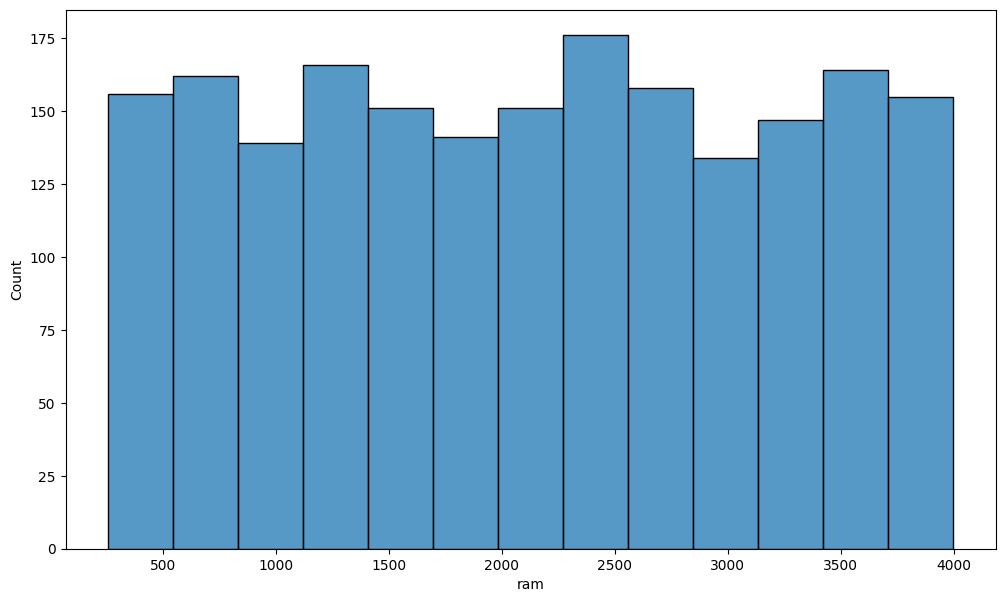

In [22]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='ram', palette='PRGn')

<Axes: xlabel='ram', ylabel='Count'>

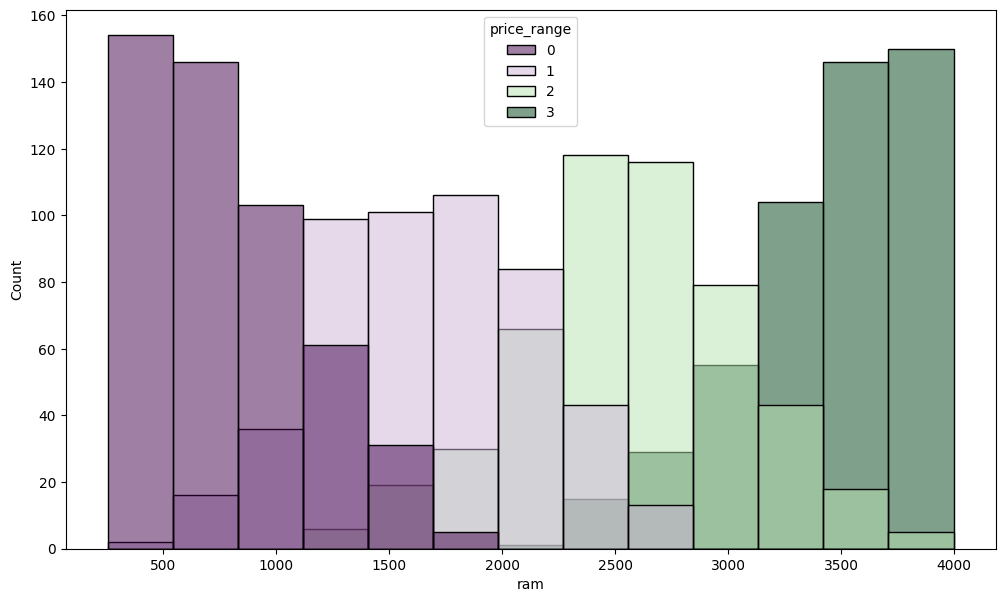

In [23]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='ram', palette='PRGn', hue='price_range')

<Axes: xlabel='n_cores', ylabel='ram'>

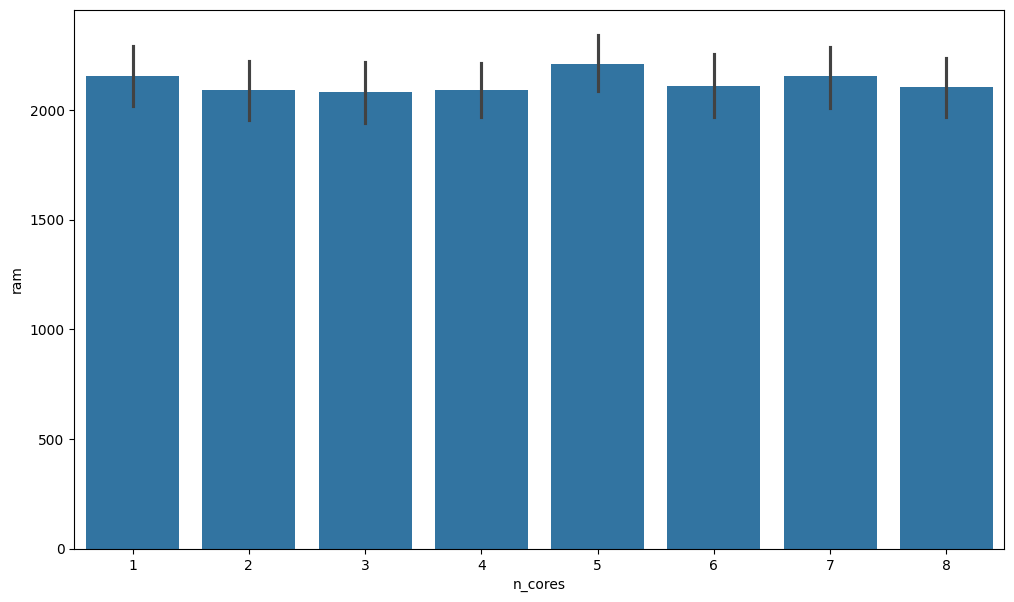

In [24]:
plt.figure(figsize=(12,7))

sns.barplot(data=mobile_train, x='n_cores', y='ram')

Text(0.5, 1.0, 'Front Camera Vs Primary Camera')

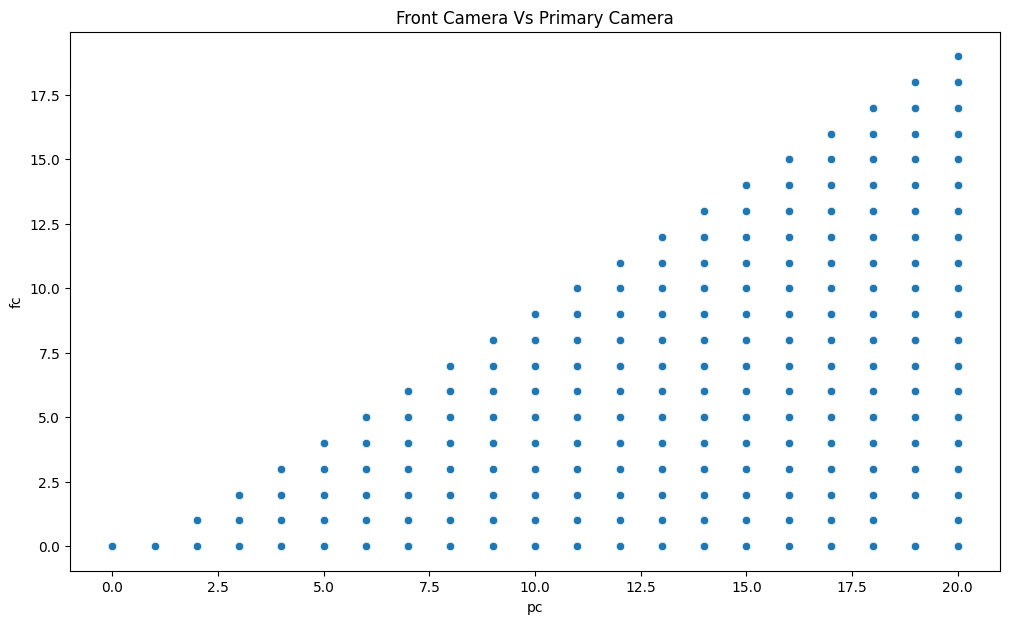

In [25]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=mobile_train, x='pc', y='fc')
plt.title('Front Camera Vs Primary Camera')

<Axes: xlabel='px_height', ylabel='px_width'>

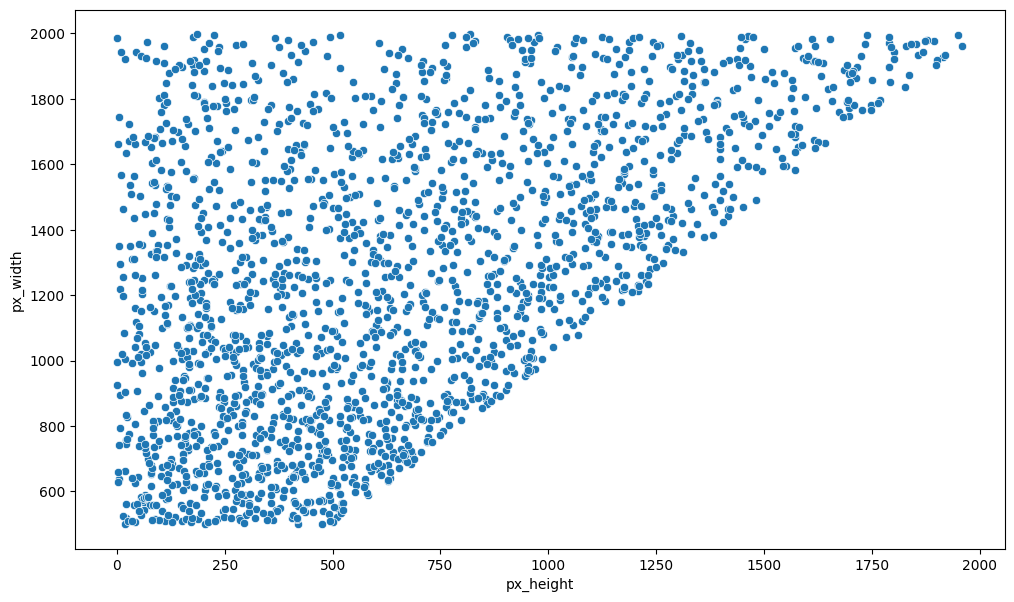

In [26]:
plt.figure(figsize=(12,7))

sns.scatterplot(data=mobile_train, x='px_height', y='px_width')

<Axes: xlabel='battery_power', ylabel='talk_time'>

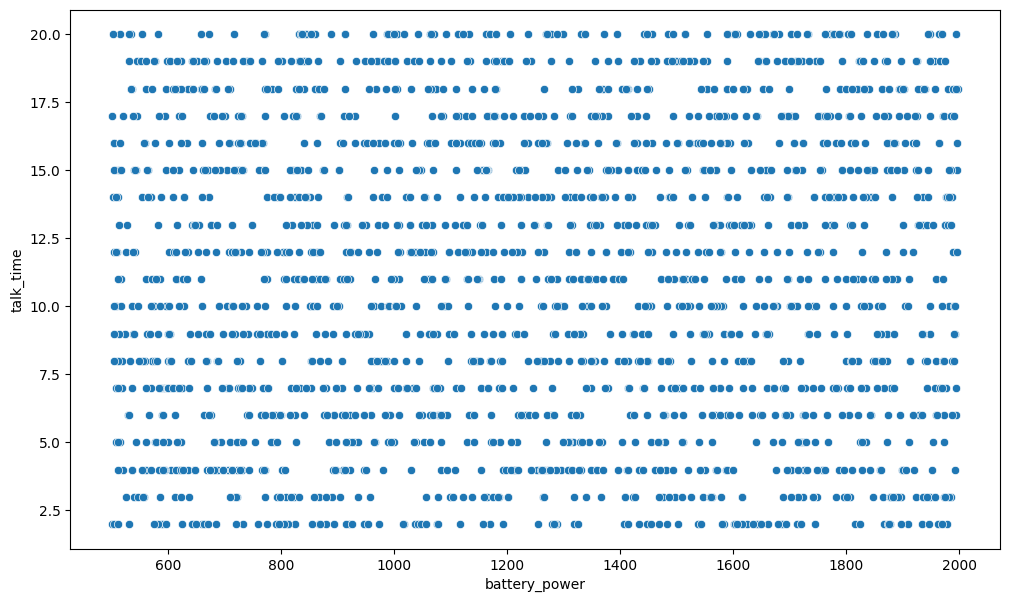

In [27]:
plt.figure(figsize=(12,7))

sns.scatterplot(data=mobile_train, x='battery_power', y='talk_time')

**Data PreProcessing**



In [28]:
training_input_data = mobile_train.drop('price_range', axis=1)
training_labels = mobile_train['price_range']

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def scale_feats(num_input_data):

  """
  Take input numerical data and return the normalized data

  """

  normalized_data = scaler.fit_transform(num_input_data)

  return normalized_data

In [31]:
training_final = scale_feats(training_input_data)

In [32]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(training_final, training_labels)

LogisticRegression()

In [33]:
log_model.score(training_final, training_labels)

0.947

**Other Regression Models:**
* SGDlassifier
* DecisionTreeClassifier


In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(training_final, training_labels)

SGDClassifier()

In [35]:

sgd_clf.score(training_final, training_labels)

0.7765

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(training_final, training_labels)

DecisionTreeClassifier()

In [37]:
tree_clf.score(training_final, training_labels)

1.0

# Model Evaluation

**Cross Validation**



In [38]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.model_selection import cross_val_score

# cv is the number of subsets/folds

log_scores = cross_val_score(log_model, training_final, training_labels,
                         cv=10)
print(log_scores)

[0.915 0.94  0.91  0.93  0.935 0.94  0.92  0.925 0.91  0.92 ]


In [41]:
log_scores.mean()

0.9245000000000001

In [42]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, training_final, training_labels,
                         cv=10)

In [43]:
sgd_scores

array([0.77 , 0.825, 0.735, 0.735, 0.685, 0.7  , 0.76 , 0.74 , 0.73 ,
       0.765])

In [44]:
sgd_scores.mean()

0.7444999999999999

In [45]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_clf, training_final, training_labels,
                         cv=10)

In [46]:

tree_scores

array([0.795, 0.86 , 0.83 , 0.82 , 0.85 , 0.825, 0.835, 0.815, 0.855,
       0.82 ])

In [47]:
tree_scores.mean()

0.8305

In [48]:
from sklearn.model_selection import cross_val_predict

# cv is the number of subsets/folds

predictions_on_train = cross_val_predict(log_model, training_final, training_labels,
                         cv=10)

# Classification Performance Metrics



**Confusion Matrix**

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(training_labels, predictions_on_train)

array([[488,  12,   0,   0],
       [ 31, 441,  28,   0],
       [  0,  35, 430,  35],
       [  0,   0,  10, 490]])

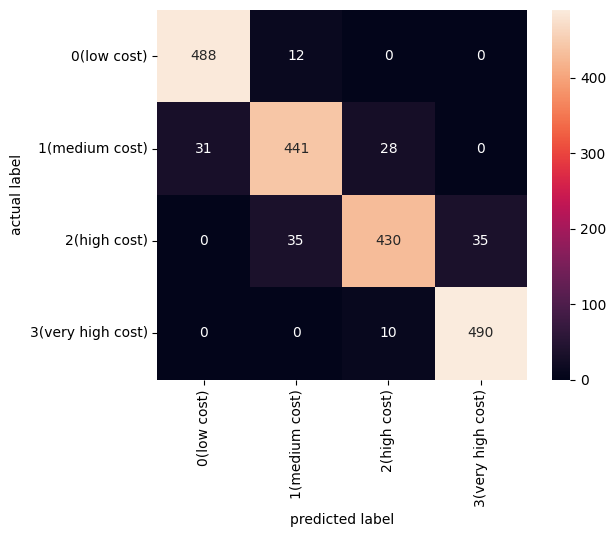

In [50]:
cm = confusion_matrix(training_labels, predictions_on_train)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'],
                        yticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(training_labels, predictions_on_train)

0.9245

In [52]:
from sklearn.metrics import classification_report

print(classification_report(training_labels, predictions_on_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       500
           1       0.90      0.88      0.89       500
           2       0.92      0.86      0.89       500
           3       0.93      0.98      0.96       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [54]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generating synthetic data
X, y = make_classification(n_samples=100, n_features=5, n_classes=2,
                           n_informative=3, n_redundant=1, n_repeated=0, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8


In [55]:
X_new = [[0.1, 0.2, 0.3, 0.4, 0.5]]  # Adjust these values according to your data

# Making predictions on new data
predicted_class = classifier.predict(X_new)

print("Predicted class:", predicted_class)

Predicted class: [1]



In binary classification, the predicted class labels typically represent one of two classes. Here's what they generally signify:

Predicted Class 0: This usually represents the negative class or the "not positive" outcome. It doesn't necessarily mean "bad" or "negative" in a qualitative sense, but rather it signifies that the data point is more likely to belong to the negative class based on the learned patterns in the training data.

Predicted Class 1: Conversely, this usually represents the positive class or the "desired" outcome. Again, it doesn't inherently imply "good" or "positive" in a qualitative sense, but rather signifies that the data point is more likely to belong to the positive class based on the learned patterns in the training data.

For example, let's consider a binary classification problem of predicting whether an email is spam or not:

Predicted Class 0: This could mean that the classifier predicts that the email is not spam. So, if the prediction is 0, it suggests that the classifier believes the email is more likely to be a legitimate (non-spam) email.

Predicted Class 1: This could mean that the classifier predicts that the email is spam. So, if the prediction is 1, it suggests that the classifier believes the email is more likely to be spam.

In summary, the predicted class labels (0 or 1) indicate the classifier's assessment of the likelihood of the data point belonging to each of the two classes based on the learned patterns from the training data.

If the predicted probability is closer to 0, it suggests that the data point is more likely to belong to the negative class (often labeled as 0).
If the predicted probability is closer to 1, it suggests that the data point is more likely to belong to the positive class (often labeled as 1).
However, in binary classification tasks, we usually need to convert these probabilities into discrete class labels. This conversion is done by applying a threshold (often 0.5 by default):

If the predicted probability is greater than or equal to the threshold, the predicted class label is set to 1.
If the predicted probability is less than the threshold, the predicted class label is set to 0.
So, in logistic regression, the predicted values indeed range between 0 and 1, representing the estimated probabilities of belonging to the positive class. These probabilities are then thresholded to obtain the final class labels (0 or 1).





